In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from keras.datasets import mnist
(train_img,train_label),(test_img,test_label)=mnist.load_data()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


11490434/11490434 [==============================] - 0s 0us/step


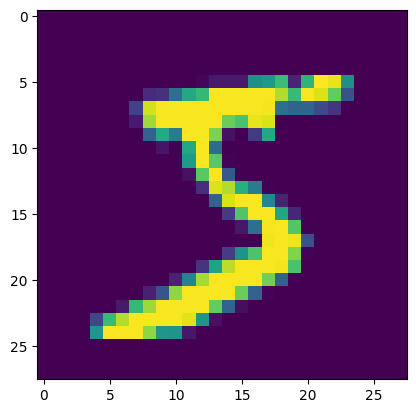

5


In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_img[0])
plt.show()
print(train_label[0])

In [4]:
from keras import models
from keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import KFold
import numpy as np

In [5]:
train_img=train_img.reshape((60000,784)).astype('float32')/255.0
test_img=test_img.reshape((10000,784)).astype('float32')/255.0
train_label=to_categorical(train_label)
test_label=to_categorical(test_label)

In [6]:
X = np.concatenate((train_img, test_img), axis=0)
Y = np.concatenate((train_label, test_label), axis=0)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
seed = 7
np.random.seed(seed)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, np.argmax(Y, axis=1)):
    model = Sequential()
    model.add(Dense(128, input_dim=784, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=10, batch_size=32, verbose=0)
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 98.01%
accuracy: 97.66%
accuracy: 97.47%
accuracy: 97.27%
accuracy: 97.80%
accuracy: 97.51%
accuracy: 97.84%
accuracy: 97.44%
accuracy: 97.73%
accuracy: 97.64%
97.64% (+/- 0.21%)
